In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import plot_tree
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
np.random.seed(10)

In [2]:
# Load Data
df = pd.read_csv('.\clickbait_data.csv')
yt_df = pd.read_csv('.\youtube_dataset.csv')
yt_df = yt_df[['Video Title', 'isClickbait']] # Change data to be more similar to df

# Clickbait Decision Tree
### Made by Nate Cowan

TF-IDF:
- Term Frequency (TF) – How frequently a word appears in a document.
- Inverse Document Frequency (IDF) – How rare or unique a word is across all documents.
- This helps highlight important, content-rich words while unweighting common words like "the", "and", "is".

fit_transform() is a two-in-one method that does:
1. fit() – Learns from the input data. In the case of TfidfVectorizer, it:
- Builds the vocabulary of unique words (based on tokenization).
- Calculates the IDF (Inverse Document Frequency) values for each word across the corpus.
2. transform() – Applies the TF-IDF transformation:
- Computes the TF-IDF score for each word in each document.
- Converts each document into a numeric vector (sparse matrix of shape [n_samples, n_features]).

## Model for news headlines

In [3]:
# Vectorize the headlines into TF-IDF features (max 5000 terms)
vectorizer_df = TfidfVectorizer(max_features=5000)
X1 = vectorizer_df.fit_transform(df['headline']) # Features
y1 = df['clickbait'] # Labels

# Split news data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42) 

In [4]:
# Train decision tree on news data
clf_df = DecisionTreeClassifier()
clf_df.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [5]:
# Evaluate model
print("Model trained on news headlines:")
print("Accuracy:", accuracy_score(y1_test, clf_df.predict(X1_test)))
print(classification_report(y1_test, clf_df.predict(X1_test)))

Model trained on news headlines:
Accuracy: 0.91796875
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3127
           1       0.92      0.92      0.92      3273

    accuracy                           0.92      6400
   macro avg       0.92      0.92      0.92      6400
weighted avg       0.92      0.92      0.92      6400



## Model for Youtube video titles

In [6]:
# Vectorize the headlines into TF-IDF features (max 5000 terms)
vectorizer_yt = TfidfVectorizer(max_features=5000)
X2 = vectorizer_yt.fit_transform(yt_df['Video Title']) # Features
y2 = yt_df['isClickbait'] # Labels

# Split Youtube data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42) 

In [7]:
# Train decision tree on Youtube data
clf_yt = DecisionTreeClassifier()
clf_yt.fit(X2_train, y2_train)

DecisionTreeClassifier()

In [8]:
# Evaluate model
print("Model trained on yt_df (YouTube titles):")
print("Accuracy:", accuracy_score(y2_test, clf_yt.predict(X2_test)))
print(classification_report(y2_test, clf_yt.predict(X2_test)))

Model trained on yt_df (YouTube titles):
Accuracy: 0.6341463414634146
              precision    recall  f1-score   support

           0       0.58      0.74      0.65        19
           1       0.71      0.55      0.62        22

    accuracy                           0.63        41
   macro avg       0.64      0.64      0.63        41
weighted avg       0.65      0.63      0.63        41



## Swap models for the data sets

In [13]:
# df-model on yt_df data
yt_swapped = vectorizer_df.transform(yt_df['Video Title'])  # Use df vectorizer
print("news model tested on youtube:")
print("Accuracy:", accuracy_score(yt_df['isClickbait'], clf_df.predict(yt_swapped)))
print(classification_report(yt_df['isClickbait'], clf_df.predict(yt_swapped)))

# yt_df-model on df data
df_swapped = vectorizer_yt.transform(df['headline'])  # Use yt_df vectorizer
print("youtube tested on news:")
print("Accuracy:", accuracy_score(df['clickbait'], clf_yt.predict(df_swapped)))
print(classification_report(df['clickbait'], clf_yt.predict(df_swapped)))

news model tested on youtube:
Accuracy: 0.6019900497512438
              precision    recall  f1-score   support

           0       0.60      0.59      0.60       100
           1       0.60      0.61      0.61       101

    accuracy                           0.60       201
   macro avg       0.60      0.60      0.60       201
weighted avg       0.60      0.60      0.60       201

youtube tested on news:
Accuracy: 0.4963125
              precision    recall  f1-score   support

           0       0.50      0.46      0.48     16001
           1       0.50      0.53      0.51     15999

    accuracy                           0.50     32000
   macro avg       0.50      0.50      0.50     32000
weighted avg       0.50      0.50      0.50     32000



In [10]:
print("Number of nodes in the tree:", clf_df.tree_.node_count)

Number of nodes in the tree: 3505


## Tree visualizations

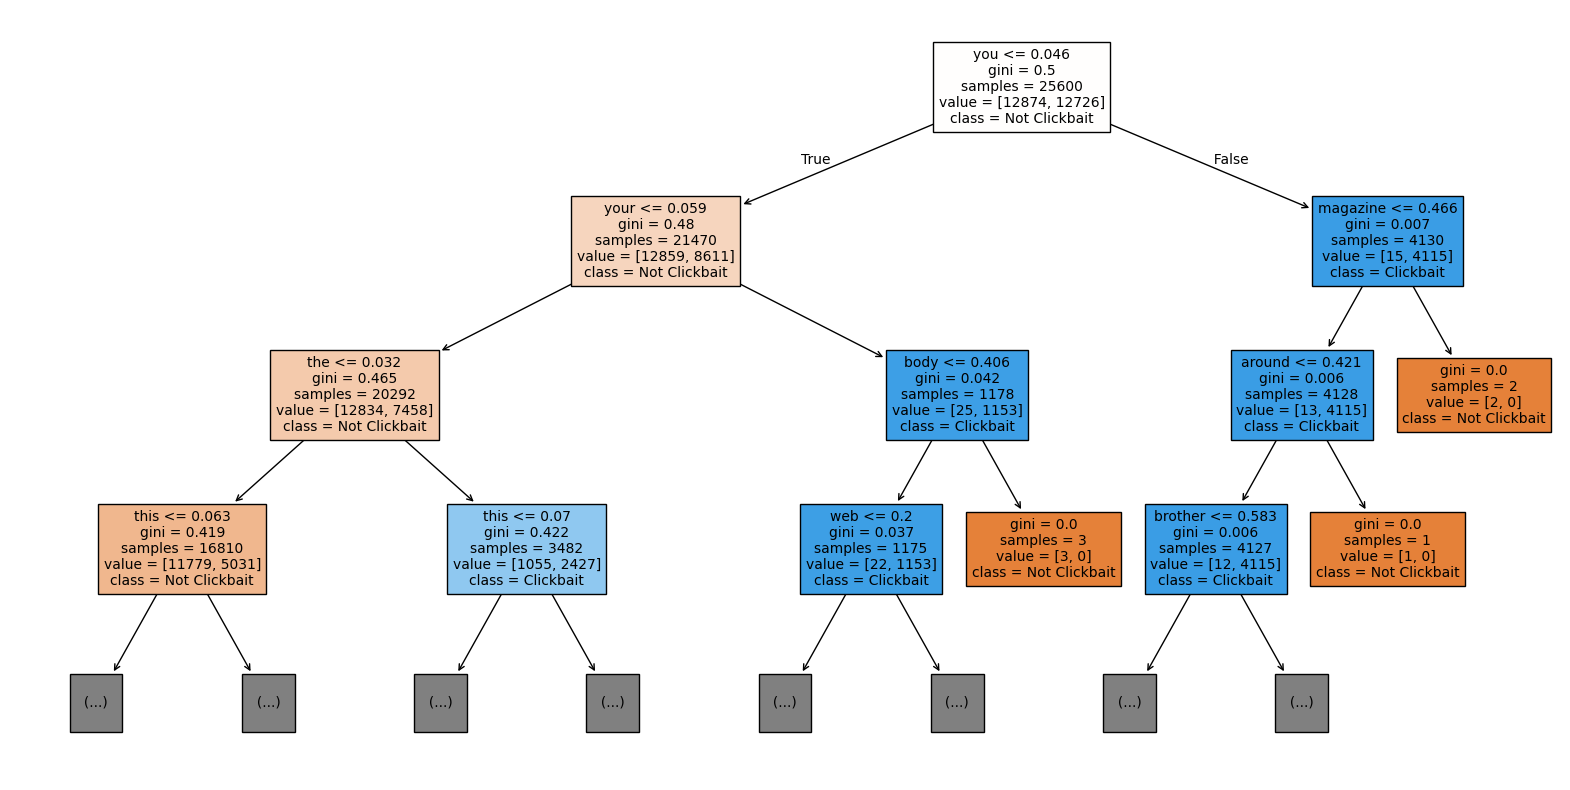

In [11]:
# Decision tree for news headlines
plt.figure(figsize=(20, 10))
plot_tree(clf_df, 
          filled=True, 
          feature_names=vectorizer_df.get_feature_names_out(), 
          class_names=["Not Clickbait", "Clickbait"],
          max_depth=3,
          fontsize=10)
plt.show()

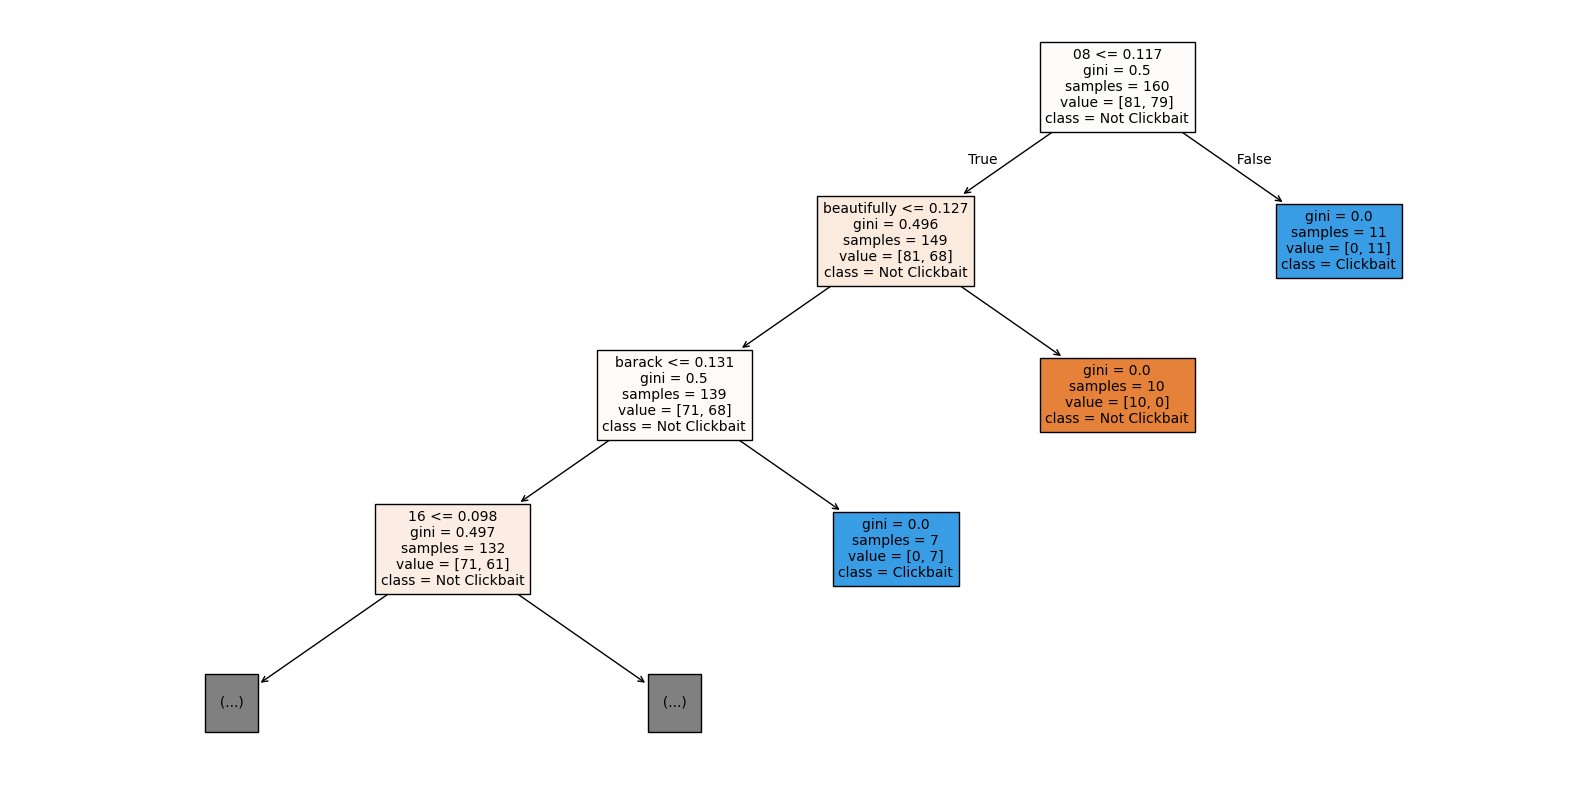

In [12]:
# Decision tree for Youtube video titles
plt.figure(figsize=(20, 10))
plot_tree(clf_yt, 
          filled=True, 
          feature_names=vectorizer_df.get_feature_names_out(), 
          class_names=["Not Clickbait", "Clickbait"],
          max_depth=3,
          fontsize=10)
plt.show()